In [2]:
import pandas as pd
from flask import Flask
import eventlet.wsgi
import eventlet
import socketio
import numpy as np
from PIL import Image
import base64
from io import BytesIO

import matplotlib.pyplot as plt
from keras.models import load_model

%matplotlib inline

Using TensorFlow backend.


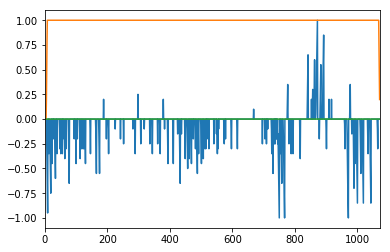

In [3]:
df = pd.read_csv('/home/lkoziol/sc/kaggle/5dwdriving/dane/driving_log.csv', 
                 names = ['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])

#df.head()
df.steering_angle.plot()
df.throttle.plot()
df['break'].plot()

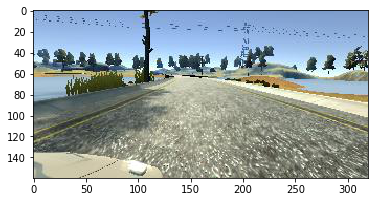

In [10]:
img = Image.open(df.right[555])
plt.imshow(img)

In [13]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [14]:
def load_image(file_name):
    return np.asarray(Image.open(file_name))

def process_image(img):
    return img[10:130:2, ::4, :]

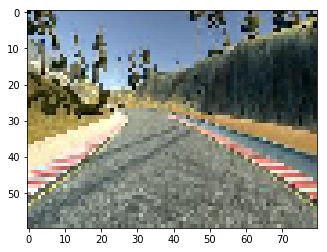

In [15]:
plt.imshow(process_image(load_image(df.center[44])))

In [28]:
X = [process_image(load_image(f)) for f in df.center]
X += [process_image(load_image(f)) for f in df.left]
X += [process_image(load_image(f)) for f in df.right]
y = np.array(df.steering_angle)
y = np.concatenate([y, y+.4, y-.4])
X = np.array(X)

In [33]:
X.shape

(3216, 60, 80, 3)

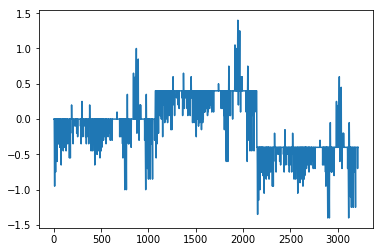

In [34]:
plt.plot(y)

In [35]:
np.save('X.npy', X)
np.save('y.npy', y)